# CS188 Project 2 - Binary Classification Comparative Methods

For this project we're going to attempt a binary classification of a dataset using multiple methods and compare results. 

Our goals for this project will be to introduce you to several of the most common classification techniques, how to perform them and tweek parameters to optimize outcomes, how to produce and interpret results, and compare performance. You will be asked to analyze your findings and provide explanations for observed performance. 

Specifically you will be asked to classify whether a <b>patient is suffering from heart disease</b> based on a host of potential medical factors.

<b><u>DEFINITIONS</b></u>


<b> Binary Classification:</b>
In this case a complex dataset has an added 'target' label with one of two options. Your learning algorithm will try to assign one of these labels to the data.

<b> Supervised Learning:</b>
This data is fully supervised, which means it's been fully labeled and we can trust the veracity of the labeling.

## Background: The Dataset 

For this exercise we will be using a subset of the UCI Heart Disease dataset, leveraging the fourteen most commonly used attributes. All identifying information about the patient has been scrubbed. 

The dataset includes 14 columns. The information provided by each column is as follows:
<ul>
    <li><b>age:</b> Age in years</li>
    <li><b>sex:</b> (1 = male; 0 = female)</li>
    <li><b>cp:</b> Chest pain type (0 = asymptomatic; 1 = atypical angina; 2 = non-anginal pain; 3 = typical angina)</li>
    <li><b>trestbps:</b> Resting blood pressure (in mm Hg on admission to the hospital)</li>
    <li><b>cholserum:</b> Cholestoral in mg/dl</li>
    <li><b>fbs</b> Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)</li>
    <li><b>restecg:</b> Resting electrocardiographic results (0= showing probable or definite left ventricular hypertrophy by Estes' criteria; 1 = normal; 2 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))</li>
    <li><b>thalach:</b> Maximum heart rate achieved</li>
    <li><b>exang:</b> Exercise induced angina (1 = yes; 0 = no)</li>
    <li><b>oldpeakST:</b> Depression induced by exercise relative to rest</li>
    <li><b>slope:</b> The slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)</li>
    <li><b>ca:</b> Number of major vessels (0-3) colored by flourosopy</li>
    <li><b>thal:</b> 1 = normal; 2 = fixed defect; 7 = reversable defect</li>
    <li><b><u>Sick:</u></b> Indicates the presence of Heart disease (True = Disease; False = No disease)</li>
</ul>
    


## Loading Essentials and Helper Functions 

In [2]:
#Here are a set of libraries we imported to complete this assignment. 
#Feel free to use these or equivalent libraries for your implementation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold


from matplotlib import pyplot
import itertools

%matplotlib inline
import random 
  
random.seed(42) 

In [3]:
# Helper function allowing you to export a graph
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [104]:
# Helper function that allows you to draw nicely formatted confusion matrices
def draw_confusion_matrix(y, yhat, classes):
    '''
        Draws a confusion matrix for the given target and predictions
        Adapted from scikit-learn and discussion example.
    '''
    plt.cla()
    plt.clf()
    matrix = confusion_matrix(y, yhat)
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    num_classes = len(classes)
    plt.xticks(np.arange(num_classes), classes, rotation=90)
    plt.yticks(np.arange(num_classes), classes)
    
    fmt = 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

## [20 Points] Part 1. Load the Data and Analyze

Let's first load our dataset so we'll be able to work with it. (correct the relative path if your notebook is in a different directory than the csv file.)

In [5]:
heartData = pd.read_csv("heartdisease.csv")

                            

### Question 1.1 Now that our data is loaded, let's take a closer look at the dataset we're working with. Use the head method to display some of the rows so we can visualize the types of data fields we'll be working with, then use the describe method, along with any additional methods you'd like to call to better help you understand what you're working with and what issues you might face. 

In [6]:
heartData.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,False
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,False
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,False
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,False
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,False


In [7]:
heartData.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [8]:
heartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
sick        303 non-null bool
dtypes: bool(1), float64(1), int64(12)
memory usage: 31.2 KB


### Question 1.2 Discuss your data preprocessing strategy. Are their any datafield types that are problemmatic and why? Will there be any null values you will have to impute and how do you intend to do so? Finally, for your numeric and categorical features, what if any, additional preprocessing steps will you take on those data elements?

 Sick is a bool and will have to be dealt with since sklearn and pipelines like to deal with numbers.
There seem to bo no null values. For categorical features, one-hot encoding would work.
For numeric, I might have to scale it so that features will be treated equally. 

### Question 1.3  Before we begin our analysis we need to fix the field(s) that will be problematic. Specifically convert our boolean sick variable into a binary numeric target variable (values of either '0' or '1'), and then drop the original sick datafield from the dataframe.

In [12]:
heartData2 =sickData.astype(int)
heartData = heartData.drop("sick", axis=1)
heartData["sick"] = heartData2
heartData.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0


In [1]:
import sklearn
sklearn.__version__

'0.22.1'

### Question 1.4 Now that we have a feel for the data-types for each of the variables, plot histograms of each field and attempt to ascertain how each variable performs (is it a binary, or limited selection, or does it follow a gradient? (Note: No need to describe each variable, but pick out a few you wish to highlight)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11814a450>,
      dtype=object)

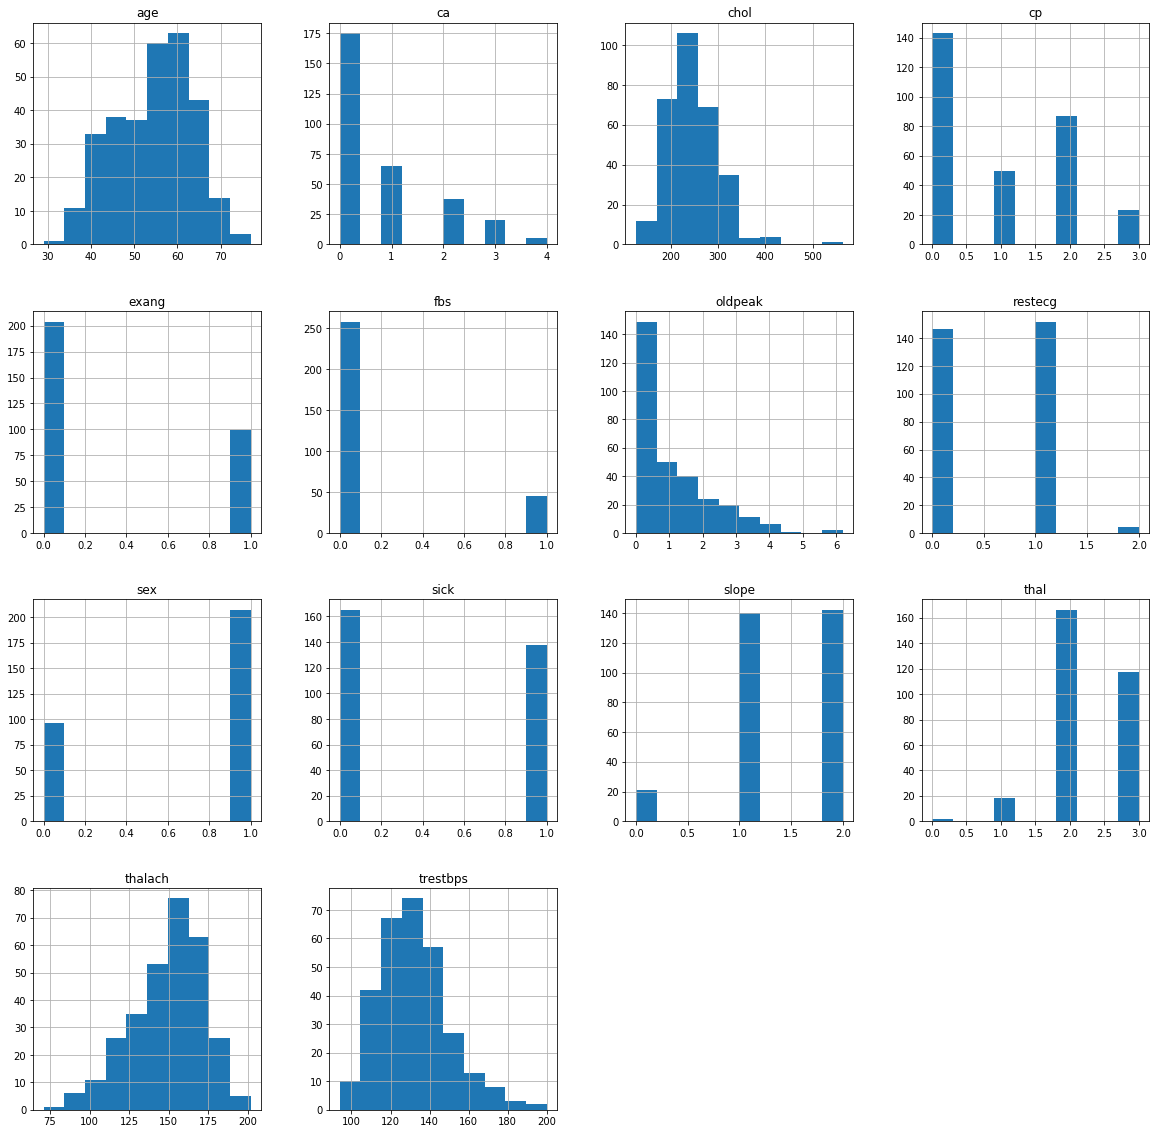

In [185]:
heartData.hist(figsize=(20,20))

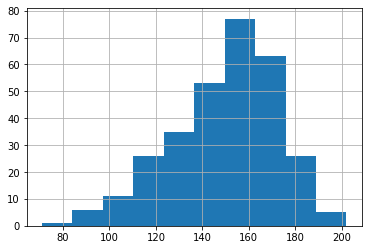

In [35]:
heartData["thalach"].hist()

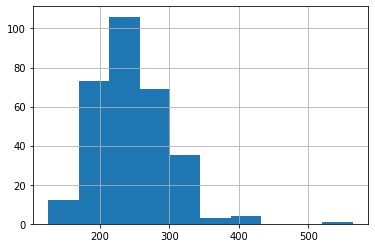

In [36]:
heartData["chol"].hist()

### Question 1.5 We also want to make sure we are dealing with a balanced dataset. In this case, we want to confirm whether or not we have an equitable number of  sick and healthy individuals to ensure that our classifier will have a sufficiently balanced dataset to adequately classify the two. Plot a histogram specifically of the sick target, and conduct a count of the number of sick and healthy individuals and report on the results: 

In [14]:
heartData["sick"].value_counts()

0    165
1    138
Name: sick, dtype: int64

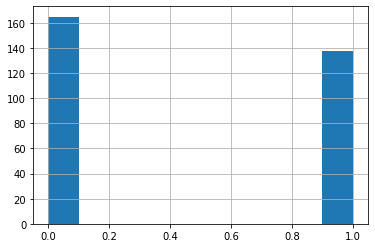

In [15]:
heartData["sick"].hist()

An optimal dataset would have even distribution.We are almost there: there is about about 46% sick and 54% not sick, so there is a sufficiently balanced data set.

### Question  1.6 Balanced datasets are important to ensure that classifiers train adequately and don't overfit, however arbitrary balancing of a dataset might introduce its own issues. Discuss some of the problems that might arise by artificially balancing a dataset.

By artificially balancing a dataset, we might train a classifier to believe the likelihood of each class is balanced. If there is less instances of one class, the model should know that that class is less likely to occur. Additionally methods to balancing it might cause a decrease in data points or worse, fake data.

### Question 1.9 Now that we have our dataframe prepared let's start analyzing our data. For this next question let's look at the correlations of our variables to our target value. First, map out the correlations between the values, and then discuss the relationships you observe. Do some research on the variables to understand why they may relate to the observed corellations. Intuitively, why do you think some variables correlate more highly than others (hint: one possible approach you can use the sns heatmap function to map the corr() method)?

In [19]:
heartData.corr()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,-0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,-0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,-0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,0.430696


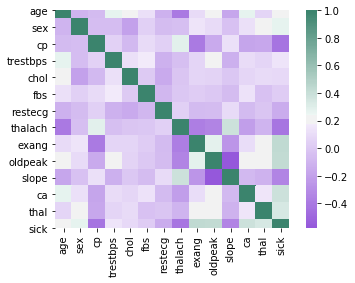

In [24]:
ax = sns.heatmap(heartData.corr(), cmap=sns.diverging_palette(1000, 520, n=200),
    square=True)


Heart Disease is correlated highly with chest pain and thalach because symptoms of heart disease are chest pain and low heart rate. 

There are also strong correlation between a few things such as age and max heart rate. As you age, your max heart rate will decrease since your body is declining. 
Similarly, women past a certain age tend to have higher cholesterol than men; this explains the strong negative correlation between sex(1 for male, 0 for female) and chol.


## [30 Points] Part 2. Prepare the Data 

Before running our various learning methods, we need to do some additional prep to finalize our data. Specifically you'll have to cut the classification target from the data that will be used to classify, and then you'll have to divide the dataset into training and testing cohorts.

Specifically, we're going to ask you to prepare 2 batches of data: 1. Will simply be the raw numeric data that hasn't gone through any additional pre-processing. The other, will be data that you pipeline using your own selected methods. We will then feed both of these datasets into a classifier to showcase just how important this step can be!

### Question 2.1 Save the target column as a separate array and then drop it from the dataframe. 

In [70]:
heartY = heartData["sick"]
heartX = heartData.drop("sick", axis=1)


### Question 2.2 First Create your 'Raw' unprocessed training data by dividing your dataframe into training and testing cohorts, with your training cohort consisting of 70% of your total dataframe (hint: use the train_test_split method) Output the resulting shapes of your training and testing samples to confirm that your split was successful.

In [82]:
from sklearn.model_selection import train_test_split
X_tr, X_ts, y_tr, y_ts = train_test_split(heartX, heartY, test_size=0.30, random_state = 2)

print(X_tr.shape)
print(X_ts.shape)
print(y_tr.shape)
print(y_ts.shape)

(212, 13)
(91, 13)
(212,)
(91,)


### Question 2.3 Now create a pipeline to conduct any additional preparation of the data you would like. Output the resulting array to ensure it was processed correctly.

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
numerical_features = ["age", "trestbps", "cholserum"]
num_pipeline = Pipeline([ 
 ('std_scaler', StandardScaler()),
])
    
full_pipeline = ColumnTransformer([
("num", num_pipeline, numerical_features),
])
    
heartPrepared =  num_pipeline.fit_transform(heartX)


### Question 2.4 Now create a separate, processed training data set by dividing your processed dataframe into training and testing cohorts, using the same settings as Q2.2 (REMEMBER TO USE DIFFERENT TRAINING AND TESTING VARIABLES SO AS NOT TO OVERWRITE YOUR PREVIOUS DATA). Output the resulting shapes of your training and testing samples to confirm that your split was successful, and describe what differences there are between your two training datasets.

In [84]:
from sklearn.model_selection import train_test_split
X_tr_p, X_ts_p, y_tr_p, y_ts_p = train_test_split(heartPrepared, heartY, 
                                                  test_size=0.30, random_state = 2)
print(X_tr_p.shape)
print(X_ts_p.shape)
print(y_tr_p.shape)
print(y_ts_p.shape)

(212, 13)
(91, 13)
(212,)
(91,)


The difference is that one set, the p or processed set, is scaled whereas the other data set is not. 

## [50 Points] Part 3. Learning Methods 

We're finally ready to actually begin classifying our data. To do so we'll employ multiple learning methods and compare result.

### Linear Decision Boundary Methods 

### SVM (Support Vector Machine)

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

### Question 3.1.1 Implement a Support Vector Machine classifier on your RAW dataset. Review the [SVM Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) for how to implement a model. For this implementation you can simply use the default settings, but set probability = True.

In [87]:
# SVM
from sklearn.svm import SVC
SVM = SVC(probability=True)
SVM.fit(X_tr, y_tr)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [88]:
y_label[y_label==-1] = 0
y_label

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0.])

### Question 3.1.2 Report the accuracy, precision, recall, F1 Score, and confusion matrix of the resulting model.

               precision    recall  f1-score   support

   no disease       0.65      0.86      0.74        50
heart disease       0.72      0.44      0.55        41

     accuracy                           0.67        91
    macro avg       0.69      0.65      0.64        91
 weighted avg       0.68      0.67      0.65        91



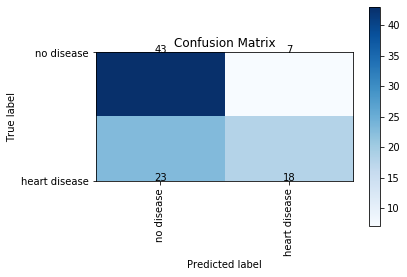

In [180]:
from sklearn import metrics
from sklearn.metrics import classification_report


def getPredictions(classifier, X):
    svm_pred = classifier.decision_function(X)
    y_label = np.sign(svm_pred)
    y_label[y_label==0] = 1
    y_label[y_label==-1] = 0
    return y_label
def printReport(classifier, X_tr, y_tr):
    y_label = getPredictions(classifier, X_tr)
    target_names = ['no disease', 'heart disease' ]
    print(classification_report(y_tr, y_label, target_names=target_names))
    draw_confusion_matrix(y_tr,y_label, ["no disease","heart disease"])

    
printReport(SVM, X_ts, y_ts)

In [155]:
y_tr.value_counts()
#checking that number of sick and not sick match

0    115
1     97
Name: sick, dtype: int64

In [182]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_tr, y_label)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.64238411 0.70491803]
recall: [0.84347826 0.44329897]
fscore: [0.72932331 0.5443038 ]
support: [115  97]


In [184]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_tr, y_label, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.64      0.84      0.73       115
     class 1       0.70      0.44      0.54        97

    accuracy                           0.66       212
   macro avg       0.67      0.64      0.64       212
weighted avg       0.67      0.66      0.64       212



### Question 3.1.3 Discuss what each measure is reporting, why they are different, and why are each of these measures is significant. Explore why we might choose to evaluate the performance of differing models differently based on these factors. Try to give some specific examples of scenarios in which you might value one of these measures over the others.

Precision: 
* Number of positives labeled correctly over total number of positive labels.
* This can be easily summarized to counting number of wrong positive labels
* This is different from recall because it shows how many positive classifications were correct versus how many positive classifications were given. 
* This measure might be valued more in scenarios like sales, where it is important that you classify people that dislike your product as negative, so that you know which customers are making you lose money. 

Recall: 
* Number of positives labeled correctly over all true positives (aka sum of true positives and false negatives). 
* This can be easily summarized to counting number of wrong negative labels.
* This is different from precision, because it shows you ratio of correct positive classifications to correct positive classifications AND incorrect negative classifications 
* This is important in datasets with small amount of negative labels. We want to maximize recall to make sure we get the few negative classifications correct
* This measure might be valued more in medical tests, where patients we classify as non-sick won't be tested further. 

f1-score: 
* This is the weighted mean of the precision and recall
* This is especially useful in a scenario where we have a low amount of one class and want to ensure we get those classifications correct.

support: 
* number of true samples for that class



### Question 3.1.4 Plot a Receiver Operating Characteristic curve, or ROC curve, and describe what it is and what the results indicate

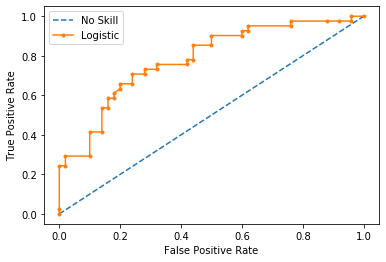

In [98]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def drawRoc(X_ts, y_ts, classifier):
    lr_probs = classifier.predict_proba(X_ts)
    lr_probs = lr_probs[:, 1]
    ns_probs = [0 for _ in range(len(y_ts))]

    ns_auc = roc_auc_score(y_ts, ns_probs)
    lr_auc = roc_auc_score(y_ts, lr_probs)
    ns_fpr, ns_tpr, _ = roc_curve(y_ts, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_ts, lr_probs)
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    pyplot.legend()
    pyplot.show()
drawRoc(X_ts, y_ts, SVM)

Receiver Operating Characteristic curve is a plot of the true positive rate versus the false positive. Our results show that the prediction is somewhat skillfull;  however, it doesn't reach a high true positive rate for a large portion of predictions. Our model is better than random, but not amazing.

### Question 3.1.5 Rerun, using the exact same settings, only this time use your processed data as inputs. 

In [113]:
SVM2 = SVC(probability=True)
SVM2.fit(X_tr_p, y_tr_p)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

### Question 3.1.6 Report the accuracy, precision, recall, F1 Score, confusion matrix, and plot the ROC Curve of the resulting model.

               precision    recall  f1-score   support

   no disease       0.85      0.94      0.90        50
heart disease       0.92      0.80      0.86        41

     accuracy                           0.88        91
    macro avg       0.89      0.87      0.88        91
 weighted avg       0.88      0.88      0.88        91



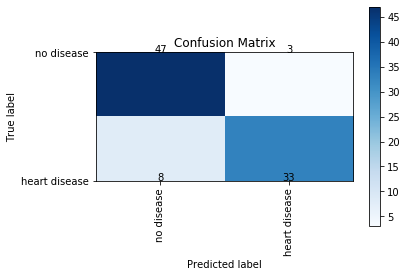

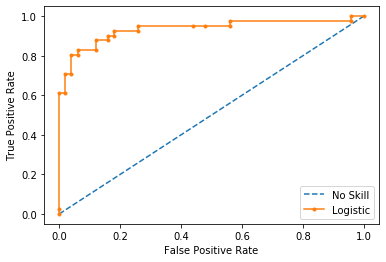

In [186]:
printReport(SVM2, X_ts_p, y_ts_p)
drawRoc(X_ts_p, y_ts_p, SVM2)

### Question 3.1.7 Hopefully you've noticed a dramatic change in performance. Discuss why you think your new data has had such a dramatic impact. 

Standard Scaling has allowed each feature to weigh equally so that features with higher correlation won't be thrown out by features with weaker correlation. 

### Question 3.1.8 Rerun your SVM, but now modify your model parameter kernel to equal 'linear'. Again report your Accuracy, Precision, Recall, F1 scores, and Confusion matrix and plot the new ROC curve.  

               precision    recall  f1-score   support

   no disease       0.84      0.92      0.88        50
heart disease       0.89      0.78      0.83        41

     accuracy                           0.86        91
    macro avg       0.86      0.85      0.85        91
 weighted avg       0.86      0.86      0.86        91



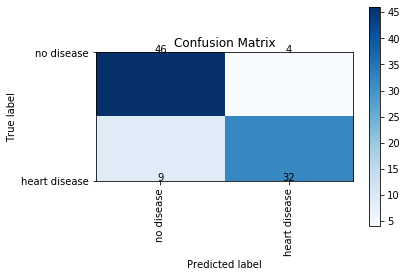

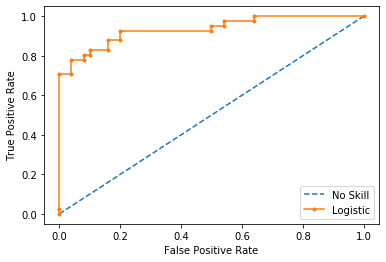

In [165]:
# SVM
SVM3 = SVC(probability=True, kernel='linear')
SVM3.fit(X_tr_p, y_tr_p)
printReport(SVM3, X_ts_p, y_ts_p)
drawRoc(X_ts_p, y_ts_p, SVM3)

### Question 3.1.9 Explain the what the new results you've achieved mean. Read the documentation to understand what you've changed about your model and explain why changing that input parameter might impact the results in the manner you've observed.

The new results are not as great. We've forced the separating line for the prediction to be a straight line, which is stricter and less accurate if the data is not linearly separable.

### Logistic Regression

Knowing that we're dealing with a linearly configured dataset, let's now try another classifier that's well known for handling linear models: Logistic Regression. Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

### Question 3.2.1 Implement a Logistical Regression Classifier. Review the [Logistical Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for how to implement the model. For this initial model set the solver = 'sag' and max_iter= 10). Report on the same four metrics as the SVM and graph the resulting ROC curve.

/Users/danieladea/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


               precision    recall  f1-score   support

   no disease       0.83      0.96      0.89        50
heart disease       0.94      0.76      0.84        41

     accuracy                           0.87        91
    macro avg       0.88      0.86      0.86        91
 weighted avg       0.88      0.87      0.87        91



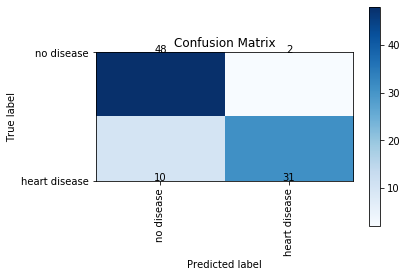

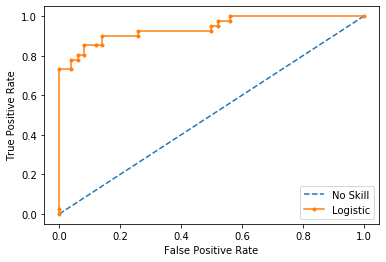

In [179]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(solver='sag', max_iter=10)
reg.fit(X_tr_p, y_tr_p)

printReport(reg, X_ts_p, y_ts_p)
drawRoc(X_ts_p, y_ts_p, reg)

### Question 3.2.2 Did you notice that when you ran the previous model you got the following warning: "ConvergenceWarning: The max_iter was reached which means the coef_ did not converge". Check the documentation and see if you can implement a fix for this problem, and again report your results.

               precision    recall  f1-score   support

   no disease       0.83      0.96      0.89        50
heart disease       0.94      0.76      0.84        41

     accuracy                           0.87        91
    macro avg       0.88      0.86      0.86        91
 weighted avg       0.88      0.87      0.87        91



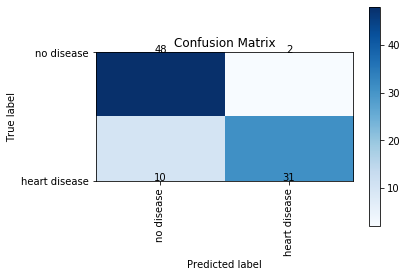

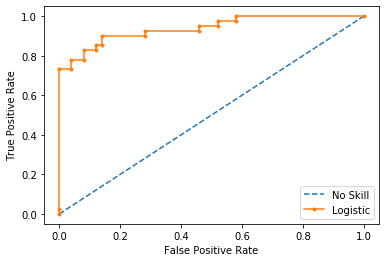

In [178]:
# Logistic Regression
reg2 = LogisticRegression(solver='sag', max_iter=100)
reg2.fit(X_tr_p, y_tr_p)

printReport(reg2, X_ts_p, y_ts_p)
drawRoc(X_ts_p, y_ts_p, reg2)

### Question 3.2.3 Explain what you changed, and why that produced an improved outcome. 

I increased max iterations, so the classifier would have more iterations to converge. It did not improve outcome and had the same output, so our model converged pretty quickly so that even a small amount of iterations can get good enough convergence so that our predictions will be decent on the test data.

### Question 3.2.4 Rerun your logistic classifier, but modify the penalty = 'none', solver='sag' and again report the results.

               precision    recall  f1-score   support

   no disease       0.83      0.96      0.89        50
heart disease       0.94      0.76      0.84        41

     accuracy                           0.87        91
    macro avg       0.88      0.86      0.86        91
 weighted avg       0.88      0.87      0.87        91



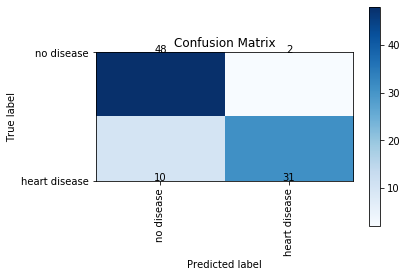

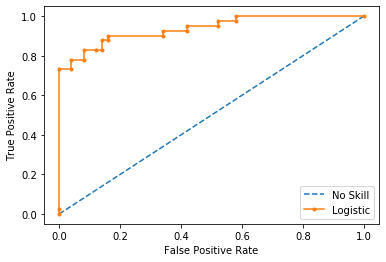

In [177]:
# Logistic Regression
reg3 = LogisticRegression(penalty='none', solver='sag')
reg3.fit(X_tr_p, y_tr_p)

printReport(reg3, X_ts_p, y_ts_p)
drawRoc(X_ts_p, y_ts_p, reg3)

### Question 3.2.5 Explain what what the penalty parameter is doing in this function, what the solver method is, and why this combination likely produced a more optimal outcome. 

The penalty parameter creates a change in the mathematical equation when the training classifier has a wrong identification, so that in the next iteration, the formula will be more likely to get it correct on the classification attempt. The solver method is the method to calculate the parameter weights for the cost function. My outcome was less optimal and in fact the same across the board. It seems that logistic regression found a separating line that could not be improved upon. My data might have a single best dividing line found by any sort of gradient descent. I think this combination might be likely to produce a more optimal outcome since it is less likely to overfit. 

### Question 3.2.6 Both logistic regression and linear SVM are trying to classify data points using a linear decision boundary, then what’s the difference between their ways to find this boundary?

Logistic Regression does gradient descent and will adjust weights of a separating equation when it gets a prediction wrong. On the other hand, SVM trains on a loss function which focuses only on the margin for separation.

### Clustering Approaches 

Let us now try a different approach to classification using a clustering algorithm. Specifically, we're going to be using K-Nearest Neighbor, one of the most popular clustering approaches. 

### K-Nearest Neighbor  

### Question 3.3.1 Implement a K-Nearest Neighbor algorithm on our data and report the results. For this initial implementation simply use the default settings. Refer to the [KNN Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for details on implementation. Report on the accuracy of the resulting model.

In [173]:
# k-Nearest Neighbors algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_tr_p, y_tr_p)
print("Accuracy:" , knn.score(X_ts_p, y_ts_p))


Accuracy: 0.8351648351648352


### Question 3.3.2 For clustering algorithms, we use different measures to determine the effectiveness of the model. Specifically here, we're interested in the Homogeneity Score, Completeness Score, V-Measure, Adjusted Rand Score, and Adjusted Mutual Information. Calculate each score (hint review the SKlearn Metrics Clustering documentation for how to implement).

In [174]:
knn_pred = knn.predict(X_ts_p)
print("Homogeneity Score: " , metrics.homogeneity_score(y_ts_p, knn_pred) ) 
print("Completeness Score: " ,metrics.completeness_score(y_ts_p, knn_pred))
print("V-Measure Score: " ,metrics.v_measure_score(y_ts_p, knn_pred))
print("Adjusted Rand Score: " ,metrics.adjusted_rand_score(y_ts_p, knn_pred))
print("Adjusted Mutual Info: " ,metrics.adjusted_mutual_info_score(y_ts_p, knn_pred))

Homogeneity Score:  0.3652460831608805
Completeness Score:  0.387656357979048
V-Measure Score:  0.37611769766581116
Adjusted Rand Score:  0.44327639645999967
Adjusted Mutual Info:  0.3708451447293061



### Question 3.3.3 Explain what each score means and interpret the results for this particular model. 

Homogeneity: This is a score of how homogenous clusters are (aka how uniform clusterings are)
This model's results are not great, but show that clusters are somewhat homogenous and not completely random.

Completeness: This is a metric measuring how well all members of the same class are put into the same cluster. 
This model's completeness score is okay and shows that the there is some 

V-Measure: This is the mean of homogeneity and completeness.
This model's V-measure is saying the homogeneity and completeness are acceptable enough for a decent classification. 

Adjusted Rand: This is a measure of similarity between two clusters, calculated by measuring pairs of points based on prediction classification and true classification. This is almost 0.5 which shows that the model has decent accuracy. 

Adjusted Mutual Info: This measures information shared by clusters, removing biases due to chance. Another way to show accuracy, this is slightly worse indicating the ground truth might lean towards having large, equal-sized clusters. 

Overall this method is doing pretty well. 

As we're beginning to see, the input parameters for your model can dramatically impact the performance of the model. How do you know which settings to choose? Studying the models and studying your datasets are critical as they can help you anticipate which models and settings are likely to produce optimal results. However sometimes that isn't enough, and a brute force method is necessary to determine which parameters to use. For this next question we'll attempt to optimize a parameter using a brute force approach. 

### Question 3.3.4 Parameter Optimization.  The KNN Algorithm includes an n_neighbors attribute that specifies how many neighbors to use when developing the cluster. (The default value is 5, which is what your previous model used.) Lets now try n values of: 1, 2, 3, 5, 10, 20, 50, and 100. Run your model for each value and report the 6 measures (5 clustering specific plus accuracy) for each. Report on which n value produces the best accuracy and V-Measure. (HINT leverage python's ability to loop to run through the array and generate results without needing to manually code each iteration).

In [175]:
n = [1, 2, 3, 5, 10, 20, 50, 100]
for x in n:
    print("neighbors =", x)
    knnTest = KNeighborsClassifier(n_neighbors=x)
    knnTest.fit(X_tr_p, y_tr_p)
    print("Accuracy:" , knnTest.score(X_ts_p, y_ts_p))
    knn_pred = knnTest.predict(X_ts_p)
    print("Homogeneity Score: " , metrics.homogeneity_score(y_ts_p, knn_pred) ) 
    print("Completeness Score: " ,metrics.completeness_score(y_ts_p, knn_pred))
    print("V-Measure Score: " ,metrics.v_measure_score(y_ts_p, knn_pred))
    print("Adjusted Rand Score: " ,metrics.adjusted_rand_score(y_ts_p, knn_pred))
    print("Adjusted Mutual Info: " ,metrics.adjusted_mutual_info_score(y_ts_p, knn_pred))
    print()

neighbors = 1
Accuracy: 0.7912087912087912
Homogeneity Score:  0.2564761037914976
Completeness Score:  0.25738299883950827
V-Measure Score:  0.2569287510391004
Adjusted Rand Score:  0.3318711200958906
Adjusted Mutual Info:  0.250833063021419

neighbors = 2
Accuracy: 0.7802197802197802
Homogeneity Score:  0.2712492016438872
Completeness Score:  0.31754741521276586
V-Measure Score:  0.2925780495152294
Adjusted Rand Score:  0.30663566446074053
Adjusted Mutual Info:  0.2862890003409096

neighbors = 3
Accuracy: 0.8351648351648352
Homogeneity Score:  0.35694816138450836
Completeness Score:  0.37174279340442645
V-Measure Score:  0.36419528948890445
Adjusted Rand Score:  0.44325979778320007
Adjusted Mutual Info:  0.3588753998267447

neighbors = 5
Accuracy: 0.8351648351648352
Homogeneity Score:  0.3652460831608805
Completeness Score:  0.387656357979048
V-Measure Score:  0.37611769766581116
Adjusted Rand Score:  0.44327639645999967
Adjusted Mutual Info:  0.3708451447293061

neighbors = 10
Accura

I got optimal results for accuracy and v-measure with n=100. I got accuracy of 89.0% as opposed to the closest of 86.8%. 

### Question 3.3.5 When are clustering algorithms most effective, and what do you think  explains the comparative results we achieved?  

Clustering algorithms are most effective when data is grouped, even if loosely, in a manner where points of one class tend to lean towards one area and points of other classes are more closely bound to a different area. As long as the n-value is large enough, grouped points will help create better classifcations. I believe my results show this phenomenon. Small n-values showed sub-par accuracies because a few stray points from the other class can throw off the model. On the other hand, large n-values look at the bigger picture and are not thrown off by stray points from the other class. 